In [1]:
# библиотеки общего назначения
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# для работы с файлами
import glob

# для проверки суррогатных моделей
import sklearn.metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# для создания моих суррготаных моделей
import MY_SOLVERS as mysol

# для отслеживания прогресса
from tqdm import tqdm

In [2]:
regimes = (pd.read_csv("./data/regimes.csv")).drop(['Num'],axis=1)
Cp = pd.DataFrame(columns=np.arange(regimes.shape[0]))
XYZ_coords = []

files = glob.glob("data/*_*_*.csv")
files.sort()
for i,path in tqdm(enumerate(files)):
    Cp[i] = pd.read_csv(path)['Cp']
    XYZ_coords.append(pd.read_csv(path, usecols=['Points:0','Points:1','Points:2']))

64it [00:11,  5.60it/s]


In [3]:
regimes

,M,alpha
0,0.94648,-3.71875
1,0.83867,-2.40625
2,0.81289,5.84375
3,0.84102,3.59375
4,0.89727,2.65625
...,...,...
59,0.85273,4.34375
60,0.82930,0.78125
61,0.85039,-3.34375
62,0.89258,4.90625


In [4]:
Cp

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.573607,0.548555,0.842745,0.809599,0.791979,0.723414,0.867583,0.775789,0.858125,0.682685,...,0.888817,0.612599,0.515108,0.839943,0.658014,0.833058,0.703074,0.506499,0.855921,0.639845
1,0.588931,0.565368,0.844624,0.816281,0.800149,0.734142,0.869889,0.784361,0.858887,0.694975,...,0.891234,0.627341,0.532501,0.843287,0.671049,0.838662,0.714525,0.524300,0.860930,0.653391
2,0.599824,0.577389,0.844777,0.820588,0.805816,0.741853,0.870488,0.790320,0.858008,0.703847,...,0.891961,0.637962,0.544781,0.844694,0.680448,0.842041,0.722781,0.536857,0.863853,0.663133
3,0.614753,0.593759,0.844128,0.825330,0.812452,0.751369,0.870513,0.797296,0.856092,0.715104,...,0.892207,0.652031,0.561804,0.845776,0.692717,0.845565,0.733111,0.554279,0.866823,0.676061
4,0.627571,0.607844,0.841594,0.828043,0.817170,0.758893,0.868668,0.802288,0.852379,0.724322,...,0.890649,0.663978,0.576518,0.844967,0.703022,0.847120,0.741427,0.569340,0.867926,0.687025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79020,-0.350037,0.088484,-0.259684,0.013429,-0.022166,0.053306,-0.310836,0.056797,-0.297100,0.053260,...,-0.440722,0.068765,0.000045,-0.260829,0.083772,-0.136683,0.053235,0.083836,-0.238053,0.024108
79021,-0.349690,0.087989,-0.261337,0.012198,-0.026402,0.053021,-0.312754,0.056574,-0.297780,0.052884,...,-0.441733,0.068292,0.001157,-0.263809,0.083443,-0.139571,0.052892,0.083438,-0.240445,0.021775
79022,-0.349562,0.087497,-0.263045,0.011046,-0.030640,0.052730,-0.314802,0.056349,-0.298357,0.052499,...,-0.442812,0.067821,0.001581,-0.265902,0.083124,-0.142297,0.052542,0.082854,-0.242854,0.019468
79023,-0.349549,0.087011,-0.264904,0.009947,-0.034811,0.052424,-0.316969,0.056092,-0.298931,0.052098,...,-0.444135,0.067351,0.001390,-0.267181,0.082815,-0.144963,0.052177,0.082095,-0.245351,0.017216


In [5]:
XYZ_coords[-1]

,Points:0,Points:1,Points:2
0,4.531483,-0.045957,0.094869
1,4.531380,-0.045805,0.094880
2,4.531278,-0.045653,0.094890
3,4.531182,-0.045496,0.094901
4,4.531093,-0.045335,0.094913
...,...,...,...
79020,5.031144,0.000827,0.613544
79021,5.028308,0.000389,0.607334
79022,5.025472,-0.000053,0.601124
79023,5.022636,-0.000499,0.594914


In [6]:
def func(test_ind):
    train_Cp = Cp.drop([test_ind], axis=1)
    test_Cp = Cp[[test_ind]]

    train_regimes = regimes.drop([test_ind],axis=0)
    test_regimes = regimes.iloc[[test_ind]]
    test_regimes_index = test_regimes.index.to_numpy()
    
    
    model = mysol.DISTRIBUTION_PREDICTION(surrogate_model_name='KRG', Npc=8)
    model.fit(regimes=train_regimes, target_T=train_Cp.T)
    
    predicted_cp = model.predict(test_regimes).T
    
    rmse_cp = np.sqrt(sklearn.metrics.mean_squared_error(test_Cp, predicted_cp))
    mae_cp = sklearn.metrics.max_error(test_Cp, predicted_cp)
    return test_Cp, predicted_cp, rmse_cp, mae_cp

In [43]:
rmse_arr = np.zeros(64)
mae_arr = np.zeros(64)

for i in tqdm(range(64)):
    _, _, rmse_cp, mae_cp = func(i)
    rmse_arr[i] = rmse_cp
    mae_arr[i] = mae_cp

100%|██████████| 64/64 [02:17<00:00,  2.15s/it]


In [59]:
IMIN = np.argmin(rmse_arr)

IMIN, regimes.iloc[IMIN], rmse_arr[IMIN], mae_arr[IMIN]

(60,
 M        0.82930
 alpha    0.78125
 Name: 60, dtype: float64,
 0.021642162151160372,
 0.184403783415153)

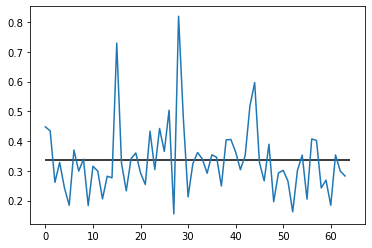

In [80]:
plt.plot(mae_arr)
plt.hlines(mae_arr.mean(),0,64)

(array([-4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 7 Text major ticklabel objects>)

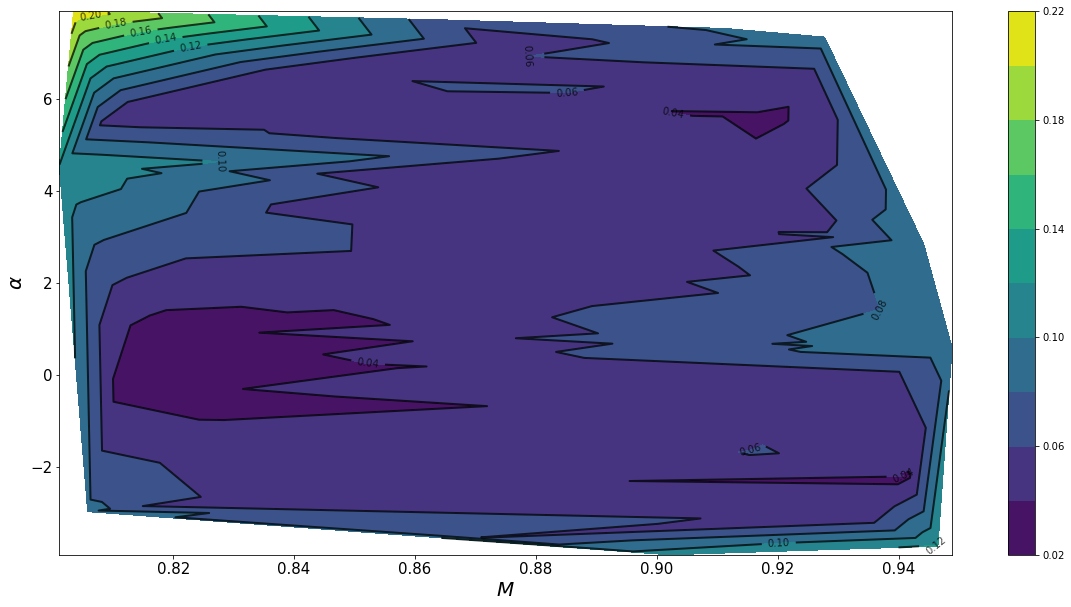

In [65]:
size = 10
plt.figure(figsize=(size*2, size))

alpha=0.75
plt.tricontourf(regimes['M'], regimes['alpha'], rmse_arr, levels=10, cmap='viridis')
cbar = plt.colorbar()
contour = plt.tricontour(regimes['M'], regimes['alpha'], rmse_arr, extend='both',
                         linewidths=2, colors='k', alpha=alpha, levels=10)
plt.clabel(contour, fontsize=10, fmt='%1.2f')

plt.xlabel(r"$M$", size=2*size)
plt.ylabel(r"$\alpha$", size=2*size)
plt.xticks(size=1.5*size)
plt.yticks(size=1.5*size)

In [61]:
IMIN = np.argmin(mae_arr)

IMIN, regimes.iloc[IMIN], rmse_arr[IMIN], mae_arr[IMIN]

(27,
 M        0.81758
 alpha    0.96875
 Name: 27, dtype: float64,
 0.03214016905497446,
 0.15545814603211688)

(array([-4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 7 Text major ticklabel objects>)

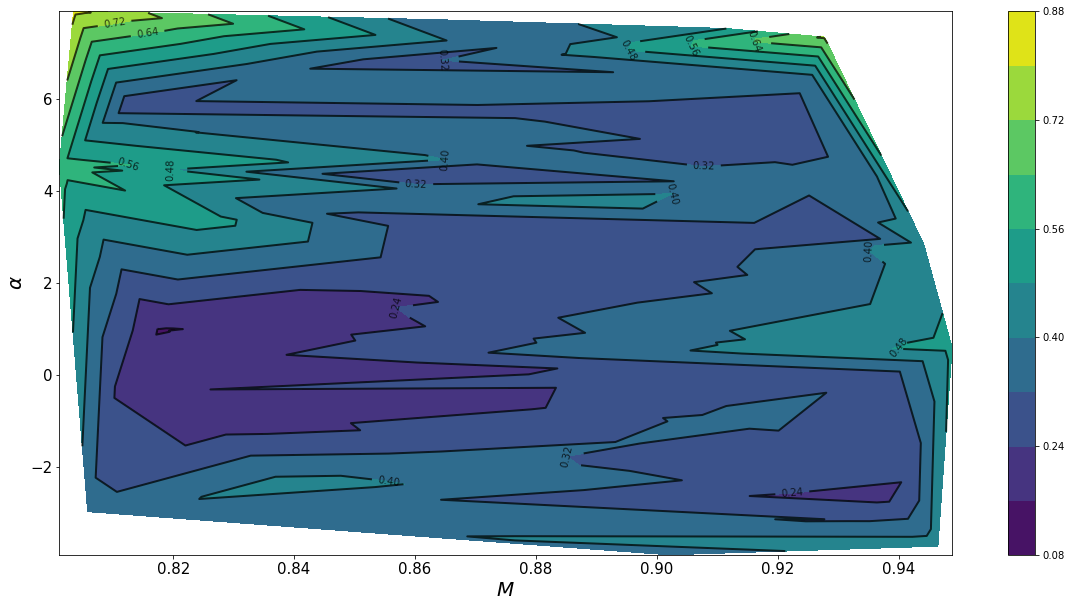

In [66]:
size = 10
plt.figure(figsize=(size*2, size))

alpha=0.75
plt.tricontourf(regimes['M'], regimes['alpha'], mae_arr, levels=10, cmap='viridis')
cbar = plt.colorbar()
contour = plt.tricontour(regimes['M'], regimes['alpha'], mae_arr, extend='both',
                         linewidths=2, colors='k', alpha=alpha, levels=10)
plt.clabel(contour, fontsize=10, fmt='%1.2f')

plt.xlabel(r"$M$", size=2*size)
plt.ylabel(r"$\alpha$", size=2*size)
plt.xticks(size=1.5*size)
plt.yticks(size=1.5*size)

In [7]:
BEST_IND = 63

regimes.iloc[BEST_IND]

M        0.91836
alpha   -1.65625
Name: 63, dtype: float64

In [8]:
test_Cp, predicted_cp, rmse_cp, mae_cp = func(BEST_IND)

In [10]:
print("rmse_cp =",rmse_cp)
print("mae_cp =", mae_cp)

rmse_cp = 0.06177158058766431
mae_cp = 0.2829236720284475


In [83]:
pd.concat([XYZ_coords[BEST_IND], test_Cp], axis=1).to_csv("/home/ruslan/Рабочий стол/ФИЗТЕХ/Научная_работа/pictures/CpField/originM091836am165625.csv", index=False)
pd.concat([XYZ_coords[BEST_IND], predicted_cp], axis=1).to_csv("/home/ruslan/Рабочий стол/ФИЗТЕХ/Научная_работа/pictures/CpField/predictedM091836am165625.csv", index=False)